In [1]:
# Mounting google drive for train images and groundtruth
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install langid

     |████████████████████████████████| 1.9MB 4.9MB/s 
  Created wheel for langid: filename=langid-1.1.6-cp36-none-any.whl size=1941190 sha256=c89981f3382a4d2f648800cdd3741b6a8352d6d927292dfa0b161202ca034fcc
  Stored in directory: /root/.cache/pip/wheels/29/bc/61/50a93be85d1afe9436c3dc61f38da8ad7b637a38af4824e86e
Successfully built langid


In [0]:
# import libraries we'll use
import spacy # fast NLP
import pandas as pd # dataframes
import langid # language identification (i.e. what language is this?)
from nltk.classify.textcat import TextCat # language identification from NLTK
from matplotlib.pyplot import plot # not as good as ggplot in R :p

In [0]:
train = pd.read_csv("/content/drive/My Drive/zs/data/train.csv") 
test = pd.read_csv("/content/drive/My Drive/zs/data/test.csv")

In [0]:
def get_lang_tags(df):
  # get the language id for each text
  ids_langid = df['job_description'].apply(langid.classify)

  # get just the language label
  langs = ids_langid.apply(lambda tuple: tuple[0])
  # how many unique language labels were applied?
  print("Number of tagged languages (estimated):")
  print(len(langs.unique()))

  # percent of the total dataset in English
  print("Percent of data in English (estimated):")
  print((sum(langs=="en")/len(langs))*100)
  return langs


In [13]:
langs = get_lang_tags(train)

Number of tagged languages (estimated):
6
Percent of data in English (estimated):
69.97224896641558


In [0]:
langs

In [14]:
test_langs = get_lang_tags(test)

Number of tagged languages (estimated):
7
Percent of data in English (estimated):
69.69671225894146


In [17]:
langs.unique()
#array(['en', 'es', 'de', 'fr', 'it', 'sv'], dtype=object)

array(['en', 'es', 'de', 'fr', 'it', 'sv'], dtype=object)

In [16]:
test_langs.unique()
# array(['en', 'fr', 'it', 'de', 'sv', 'da', 'es'], dtype=object)

array(['en', 'fr', 'it', 'de', 'sv', 'da', 'es'], dtype=object)

In [10]:
langs.unique()

array(['en', 'es', 'de', 'fr', 'it', 'sv'], dtype=object)

In [19]:
# # get the language id for each text
# ids_langid = train['job_description'].apply(langid.classify)

# # get just the language label
# langs = ids_langid.apply(lambda tuple: tuple[0])
ids_langid.shape,langs.shape

((17657,), (17657,))

In [23]:
# get a list of tweets labelled "es" by langid
spanish_rows = train['job_description'][langs == "es"]

# load a Spanish-language Spacy model
from spacy.lang.es import Spanish
nlp_es = Spanish(path=None)
nlp_es.max_length = 5500000
# apply the Spanish language model to our daya
doc_es = nlp_es(' '.join(spanish_rows))

# print the longest tokens
sorted(doc_es, key=len, reverse=True)[0:5]


[ch.linkedin.com/in/regulatoryaffairsswitzerland,
 ch.linkedin.com/in/regulatoryaffairsswitzerland,
 ch.linkedin.com/in/regulatoryaffairsswitzerland,
 ch.linkedin.com/in/regulatoryaffairsswitzerland,
 ch.linkedin.com/in/regulatoryaffairsswitzerland]

In [31]:
train.head()

,job_no,job_description,job_type,category,lang_id
0,Id-12765,Zest Scientific is searching for an accomplis...,Permanent,"Pharmaceutical, Healthcare and Medical Sales",en
1,Id-22925,"En el mundo de los CRO's típicos, esta compañí...",Permanent,Clinical Research,es
2,Id-1321,Asha Mistry of Umbilical Life is recruiting an...,Contract/Interim,Pharmaceutical Marketing,en
3,Id-9473,Sales Representative - Laser in der Medizinte...,Permanent,"Pharmaceutical, Healthcare and Medical Sales",en
4,Id-14952,Field Service Engineer - Life Science\r\r\r\nC...,Permanent,Manufacturing & Operations,en


In [0]:
train['lang_id'] = langs
test['lang_id'] = test_langs

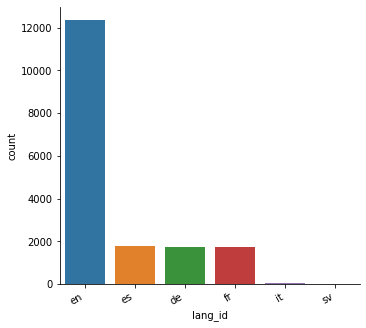

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.catplot(x='lang_id',kind='count',data=train,orient="h")
ax.fig.autofmt_xdate()

# plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# fig, axes = plt.subplots(figsize=(7,5), dpi=100)
# plt.bar(train.index, height=train.lang_id)
# plt.title('Barplot of Languages');

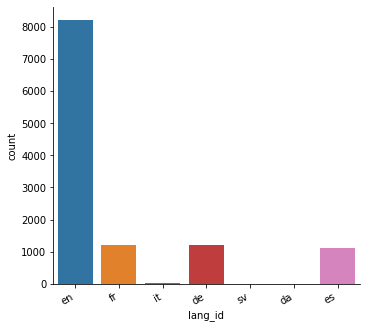

In [39]:


ax = sns.catplot(x='lang_id',kind='count',data=test,orient="h")
ax.fig.autofmt_xdate()

In [0]:
## Need to focus on es, de, fr and en
#es = spanish
#fr = French
#en = English
#de = German
#it = Italian
#sv = Swedish
#da = DAnish
# http://www.lingoes.net/en/translator/langcode.htm

